<h1> Soal 1: Pemahaman Tentang Model Evaluasi</h1>

Jawab pertanyaan di bawah ini dengan bahasa masing-masing?

1. Apa perbedaan antara data latih, data validasi, dan data test?
2. Bagaimana cara kita menilai performa suatu model?
3. Apa itu Confusion Matrix? Jelaskan secara lengkap!
4. Apa itu Classification Report dari sklearn?

Jawab :

1. Data latih atau data train adalah data yang digunakan untuk melatih mesih dalam mempelajari sebuah data. Data validasi adalah data yang digunakan untuk proses validasi dalam rangka menghindari data overfitting, sedangkan data test adalah data yang digunakan untuk melakukan tes pada model, sebagai simulasi penggunaan model pada dunia nyata. Data testing tidak boleh pernah dilihat oleh model sebelumnya.


2. Untuk mengevaluasi kinerja suatu model tidak hanya ditentukan oleh akurasi saja. Terdapat beberapa cara lain yang dapat digunakan untuk menilai performa dari suatu model, diantaranya :
- Klasifikasi (classification metrics): accuracy, precision, recall, F1-score, ROC, AUC, dan lainnya
- Regresi (regression metrics) : MSE, MAE, dan lainnya
- Klastering (clustering metrics): Silhouette Coefficient, Davies-Bouldin Index, Dunn Index, dan lainnya

3. Confusion Matrix adalah pengukuran performa untuk masalah klasifikasi machine learning dimana output dapat berupa dua kelas atau lebih.  Confusion Matrix adalah tabel dengan 4 kombinasi berbeda dari nilai prediksi dan nilai aktual. Ada empat istilah yang merupakan representasi hasil proses klasifikasi pada confusion matrix yaitu True Positif (TP), True Negatif (TN), False Positif (FP), dan False Negatif (FN).


4. Classification report adalah fungsi dari salah satu modul metrics sklearn yang bertujuan untuk menilai kinerja model yang telah dibuat sebelumnya. Adapun performance metrics yang biasa digunakan adalah :
- Accuracy : menggambarkan seberapa akurat model dapat mengklasifikasikan dengan benar.
- Precision : menggambarkan tingkat keakuratan antara data yang diminta dengan hasil prediksi yang diberikan oleh model.
- Recall : menggambarkan keberhasilan model dalam menemukan kembali sebuah informasi.

<h1>Soal 2: Aplikasi Model Evaluasi</h1>

Kali ini kita akan menggunakan data untuk memprediksi kelangsungan hidup pasien yang telah mengalami operasi payudara. Dengan informasi yang dimiliki terkait pasien, kita akan membuat model untuk memprediksi apakah pasien akan bertahan hidup dalam waktu lebih dari 5 tahun atau tidak.

Lebih Lengkapnya kalian bisa membaca informasi tentang dataset di link berikut: https://raw.githubusercontent.com/jbrownlee/Datasets/master/haberman.names

Buat model Klasifikasi (Model/Algoritma Bebas) untuk memprediksi status pasien dengan ketentuan sebagai berikut:

1. Bagi kedua data ini menjadi data training dan data test dengan test_size=0.25.
3. Pelajar tentang metrics roc_auc_score kemudian buatlah model dan evaluasi dengan menggunakan teknik cross-validation dengan scoring 'roc_auc'. Baca https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html untuk menggunakan metric roc_auc saat cross-validation.
3. Berapa score rata2 dari model dengan teknik cross-validation tersebut?
4. Prediksi data test dengan model yang telah kalian buat!
5. Bagaimana hasil confusion matrix dari hasil prediksi tersebut?
6. Bagaimana classification report dari hasil prediksi tersebut?
5. Seberapa baik model anda dalam memprediksi seorang pasien mempunyai status positive?
6. Seberapa baik model anda dalam memprediksi seorang pasien mempunyai status negatif?

In [1]:
import pandas as pd

url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/haberman.csv'
list_cols = ['Age', "Patient's Years", "N_positive_ax", "survival_status"]
df = pd.read_csv(url, names=list_cols)

In [2]:
df.head()

,Age,Patient's Years,N_positive_ax,survival_status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


In [3]:
df['survival_status'].value_counts()

1    225
2     81
Name: survival_status, dtype: int64

In [4]:
# mendefinisikan data target dan data feature
x = df.drop('survival_status', axis=1)
y = df['survival_status']

In [5]:
# membagi kedua data ini menjadi data training dan data test dengan test_size=0.25
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 0)
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(229, 3) (229,)
(77, 3) (77,)


In [6]:
# model algoritma dtree dan evaluasi dengan menggunakan teknik cross-validation dengan scoring 'roc_auc'
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
dtree = DecisionTreeClassifier()

print(cross_val_score(dtree, x, y, scoring="roc_auc", cv = 5))
mean_score = cross_val_score(dtree, x, y, scoring="roc_auc", cv = 5).mean()
print('Score rata rata : ', mean_score)

[0.53529412 0.37430556 0.6125     0.54722222 0.60625   ]
Score rata rata :  0.5322140522875817


In [7]:
# prediksi data test dengan data model yang sudah ada
from IPython.display import display
dtree.fit(x_train, y_train)
y_pred = dtree.predict(x_test)
print('Hasil prediksi data test : ')
display(y_pred)

Hasil prediksi data test : 


array([2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1,
       1, 1, 2, 2, 1, 2, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 2, 1, 2, 1, 2, 1,
       1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1,
       1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1], dtype=int64)

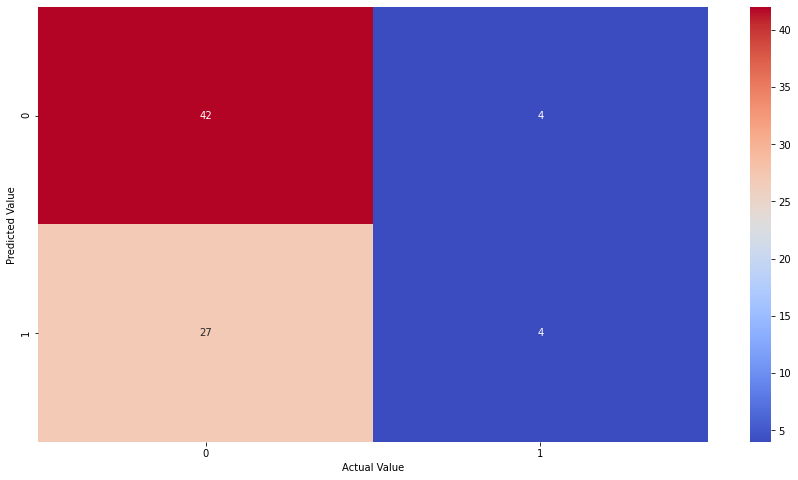

In [26]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred) 

import seaborn as sns
import matplotlib.pyplot as plt
f, ax = plt.subplots(figsize=(15,8))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='', cmap='coolwarm', ax=ax)
plt.xlabel('Actual Value')
plt.ylabel('Predicted Value')

plt.show()

<h1> Soal 3: Pemahaman Tentang Model Selection</h1>

Jelaskan dengan bahasa sendiri!

1. Apa itu Bias dan Variance?
2. Apa itu Overfitting dan Underfitting?
3. Apa yang bisa kita lakukan untuk mengatur kompleksitas dari model?
4. Bagaimana model yang baik?
5. Kapan kita menggunakan GridSearchcv dan kapan menggunakan RandomizedSearchCV?

Jawab :

1. Bias adalah perbedaan antara rata-rata hasil prediksi model dengan nilai yang sebenarnya. Sedangkan variance merupakan variability prediksi model terhadap data point yang menunjukkan sebaran datanya.


2. Overfitting adalah kondisi yang terjadi ketika model yang telah dibuat dapat membaca noise yang ada pada data dan hal ini terjadi ketika suatu model diperintahkan untuk mempelajari data yang memiliki banyak noise. Sedangkan underfitting adalah kondisi yang terjadi ketika model yang telah dibuat tidak dapat mempelajari data pattern.


3. Yang bisa dilakukan untuk mengatur adanya kompleksitas model adalah selain dengan memilih data yang tepat untuk menghindari terjadinya underfitting, beberapa strategi yang digunakan untuk menghindari overfitting diantaranya yaitu :
- Menggunakan lebih banyak data training.
- Mengurangi kapasitas dari neural network.
- Menambahkan regularisasi berat
- Menambahkan dropout.

4. Model yang baik adalah model yang bisa menjelaskan data tanpa terpengaruh oleh data noise. Model tidak akan fit terhadap tiap data point, namun mampu menjelaskan trend atau kelompok data. Model yang baik akan memiliki low coss dan akurasi tinggi.


5. GridSearchCV dilakukan ketika model butuh dicek satu per satu sebelum penentuan parameter dan bagus di implementasikan pada data yang sedikit sedangkan RandomizedSearchCV dilakukan ketika model akan dicek random dan metode ini bagus untuk data engan parameter yang cukup banyak.

<h1> Soal 4: Aplikasi Model Selection</h1>

1. Bagi kedua data berikut ini menjadi data training dan data test dengan test_size=0.25.
2. Gunakan algoritma KNN sebagai model classifier.
3. Gunakan fungsi GridSearchCV untuk hyperparameter tuning dan model selection.
4. jumlah fold bebas!, gunakan scoring 'roc_auc'
5. Definisikan kombinasi hyperparameter untuk model selection dengan GridSearchCV. kombinasi Hyperparameter bebas, baca lagi dokumentasi KNN di link berikut https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html untuk memahami lagi jenis2 hyperparameter di algorithma KNN.
6. Latih model terhadap data training.
7. Apa hyperparameter terbaik untuk kombinasi hyperparameter kalian?
8. Berapa score validasi terbaik dari model tersebut?
9. Prediksi probabilitasi output dari model yang telah di buat terhadap data test. note : gunakan method .predict_proba() untuk menghasilkan output probabilitas
10. Perhatikan bahwa hasil prediksi ada 2, dimana masing2 adalah nilai probabilitas untuk setiap class label. Ambil nilai probabilitas pasien phositive meninggal dalam waktu kurang dari 5 tahun. note : gunakan bantuan attirubte .classes_ untuk mengetahui urutan label dari hasil prediksi probabilitas.
11. Berapa nilai score roc_auc untuk data test?
12. Apakah model anda termasuk baik, overtting, atau underfitting?
13. Ulangi tahap di atas namun kali ini menggunakan algoritma DecisionTreeClassifier dan kalian bisa menggunakan RandomizedSearchCV apabila process training lama. pelajari algoritma DecisionTreeClassifier di linkberikut: https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html?highlight=decisiontreeclassifier#sklearn.tree.DecisionTreeClassifier
14. Bandingkan scorenya dengan Algoritma KNN, mana yang lebih baik?

Note : Data Science adalah experiment, sangat di dimungkinkan memerlukan beberapa kali percobaan untuk mendapatkan hasil yang terbaik! Happy Coding :)

In [8]:
import pandas as pd

url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/haberman.csv'
list_cols = ['Age', "Patient's Years", "N_positive_ax", "survival_status"]
df = pd.read_csv(url, names=list_cols)

In [9]:
df.head()

,Age,Patient's Years,N_positive_ax,survival_status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


In [10]:
# mendefinisikan data target dan data feature
x = df.drop('survival_status', axis=1)
y = df['survival_status']

In [11]:
# membagi data dengan test_size = 0.25
# data latih digunakan untuk belajar
# data test digunakan untuk prediksi

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 0)
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(229, 3) (229,)
(77, 3) (77,)


<h3> Algoritma KNN </h3>

In [12]:
# klasifikasi dengan menggunakan algoritma knn
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(x_train, y_train)

KNeighborsClassifier()

In [13]:
from sklearn.model_selection import GridSearchCV

# fungsi gridsearchcv
grid_params = {'n_neighbors':[3,5,7,9],
              'weights':['uniform','distance'],
              'metric':['euclidean','manhattan']}

# kombinasi hyperparameter dengan gridsearchcv
grid = GridSearchCV(KNeighborsClassifier(), grid_params,
                   verbose=1, cv=3, n_jobs=-1, scoring='roc_auc')

# latih model terhadap data train
grid.results = grid.fit(x_train, y_train)

Fitting 3 folds for each of 16 candidates, totalling 48 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  48 out of  48 | elapsed:    4.3s finished


In [14]:
# hyperparameter terbaik
print('Hyperparameter terbaik untuk kombinasi hyperparameter adalah : ',grid.results.best_params_)

Hyperparameter terbaik untuk kombinasi hyperparameter adalah :  {'metric': 'manhattan', 'n_neighbors': 7, 'weights': 'uniform'}


In [15]:
# score validasi terbaik
print('Score validasi terbaik untuk model adalah : ',grid.results.best_score_)

Score validasi terbaik untuk model adalah :  0.6803075149551345


In [16]:
# prediksi proba
predict = grid.predict_proba(x_test)
predict

array([[1.        , 0.        ],
       [0.71428571, 0.28571429],
       [0.71428571, 0.28571429],
       [1.        , 0.        ],
       [0.71428571, 0.28571429],
       [0.71428571, 0.28571429],
       [1.        , 0.        ],
       [0.42857143, 0.57142857],
       [0.42857143, 0.57142857],
       [0.85714286, 0.14285714],
       [0.85714286, 0.14285714],
       [0.85714286, 0.14285714],
       [0.42857143, 0.57142857],
       [0.71428571, 0.28571429],
       [0.28571429, 0.71428571],
       [0.85714286, 0.14285714],
       [0.42857143, 0.57142857],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [0.71428571, 0.28571429],
       [0.85714286, 0.14285714],
       [1.        , 0.        ],
       [0.28571429, 0.71428571],
       [0.57142857, 0.42857143],
       [1.        , 0.        ],
       [0.71428571, 0.28571429],
       [0.85714286, 0.14285714],
       [0.85714286, 0.14285714],
       [1.

In [17]:
# melihat class yang dibutuhkan
grid.classes_

array([1, 2], dtype=int64)

In [18]:
# prediksi dengan syarat
probability = predict[:,1]
probability

array([0.        , 0.28571429, 0.28571429, 0.        , 0.28571429,
       0.28571429, 0.        , 0.57142857, 0.57142857, 0.14285714,
       0.14285714, 0.14285714, 0.57142857, 0.28571429, 0.71428571,
       0.14285714, 0.57142857, 0.        , 0.        , 0.        ,
       0.        , 0.28571429, 0.14285714, 0.        , 0.71428571,
       0.42857143, 0.        , 0.28571429, 0.14285714, 0.14285714,
       0.        , 0.        , 0.28571429, 0.28571429, 0.28571429,
       0.        , 0.        , 0.28571429, 0.57142857, 0.14285714,
       0.57142857, 0.        , 0.28571429, 0.14285714, 0.28571429,
       0.14285714, 0.14285714, 0.42857143, 0.28571429, 0.        ,
       0.14285714, 0.14285714, 0.28571429, 0.14285714, 0.        ,
       0.14285714, 0.        , 0.14285714, 0.        , 0.14285714,
       0.28571429, 0.        , 0.        , 0.28571429, 0.28571429,
       0.        , 0.        , 0.14285714, 0.14285714, 0.57142857,
       0.14285714, 0.57142857, 0.14285714, 0.42857143, 0.14285

In [19]:
# nilai score roc_auc dari data test
from sklearn.metrics import roc_auc_score
y_pred = knn.predict(x_test)
roc_auc_score = roc_auc_score(y_test, y_pred)
print('Score roc_auc untuk data test : ',roc_auc_score)

Score roc_auc untuk data test :  0.5210378681626928


Data termasuk underfitting karena nilai score nya hanya 0,5210378681626928

<h3> Algoritma Decision Tree </h3>

In [21]:
# klasifikasi dengan menggunakan algoritma decision tree
from sklearn.tree import DecisionTreeRegressor
dtree = DecisionTreeRegressor()
dtree.fit(x_train, y_train)

DecisionTreeRegressor()

In [22]:
from sklearn.model_selection import RandomizedSearchCV

# fungsi randomsearchcv
rand_params = {
               'splitter':['best','random'],
               'max_depth':[4,6,8,10],
               'min_samples_split':[2,3,4],
               'min_samples_leaf':[3,4,5],
               'max_leaf_nodes':[10,12]}

# kombinasi hyperparameter dengan randomsearchcv
rand = GridSearchCV(DecisionTreeRegressor(), rand_params,
                   verbose=1, cv=3, n_jobs=-1, scoring='roc_auc')

# latih model terhadap data train
rand.results = rand.fit(x_train, y_train)

Fitting 3 folds for each of 144 candidates, totalling 432 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 312 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done 432 out of 432 | elapsed:    1.1s finished


In [23]:
# hyperparameter terbaik
print('Hyperparameter terbaik untuk kombinasi hyperparameter adalah : ',rand.results.best_params_)

Hyperparameter terbaik untuk kombinasi hyperparameter adalah :  {'max_depth': 4, 'max_leaf_nodes': 10, 'min_samples_leaf': 3, 'min_samples_split': 2, 'splitter': 'random'}


In [24]:
# score validasi terbaik
print('Score validasi terbaik untuk model adalah : ',rand.results.best_score_)

Score validasi terbaik untuk model adalah :  0.700038191917967


In [28]:
# prediksi
predict = rand.predict(x_test)
predict

array([1.2195122 , 1.45454545, 1.15384615, 1.2195122 , 1.45454545,
       1.45454545, 1.07894737, 1.45454545, 1.45454545, 1.07894737,
       1.07894737, 1.15384615, 1.2195122 , 1.15384615, 1.45454545,
       1.15384615, 1.45454545, 1.2195122 , 1.07894737, 1.07894737,
       1.15384615, 1.2195122 , 1.15384615, 1.45454545, 1.45454545,
       1.2195122 , 1.2195122 , 1.2195122 , 1.2195122 , 1.2195122 ,
       1.07894737, 1.07894737, 1.45454545, 1.2195122 , 1.07894737,
       1.2195122 , 1.07894737, 1.07894737, 1.45454545, 1.07894737,
       1.45454545, 1.45454545, 1.07894737, 1.2195122 , 1.07894737,
       1.07894737, 1.07894737, 1.2195122 , 1.07894737, 1.45454545,
       1.15384615, 1.07894737, 1.2195122 , 1.07894737, 1.07894737,
       1.07894737, 1.2195122 , 1.2195122 , 1.15384615, 1.07894737,
       1.07894737, 1.2195122 , 1.07894737, 1.2195122 , 1.2195122 ,
       1.07894737, 1.2195122 , 1.07894737, 1.2195122 , 1.66666667,
       1.2195122 , 1.45454545, 1.2195122 , 1.45454545, 1.21951

In [27]:
# nilai score roc_auc dari data test
from sklearn.metrics import roc_auc_score
y_pred = dtree.predict(x_test)
roc_auc_score = roc_auc_score(y_test, y_pred)
print('Score roc_auc untuk data test : ',roc_auc_score)

Score roc_auc untuk data test :  0.5525946704067322


Data termasuk underfitting karena nilai score nya hanya 0,5525946704067322

<h3> Perbandingan 2 Algoritma</h3>

In [29]:
from sklearn.metrics import roc_curve, roc_auc_score
proba1 = knn.predict_proba(x_test)[:,1]
proba2 = dtree.predict(x_test)
fpr1, tpr1, thresholds1 = roc_curve(y_test, proba1, pos_label=2)
fpr2, tpr2, thresholds2 = roc_curve(y_test, proba2, pos_label=2)

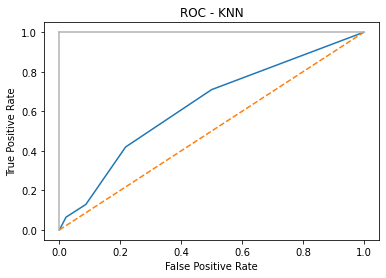

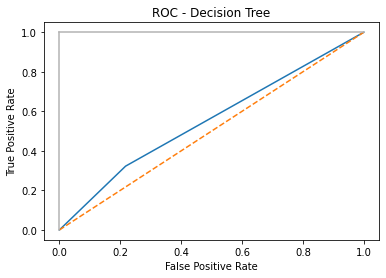

In [30]:
import matplotlib.pyplot as plt
plt.subplots(figsize=(6,4))
plt.title('ROC - KNN')
plt.plot(fpr1, tpr1)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")

plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

plt.subplots(figsize=(6,4))
plt.title('ROC - Decision Tree')
plt.plot(fpr2, tpr2)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")

plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()